In [1]:
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [ ]:
#辨識圖片地標

In [3]:
subscription_key = "e400e3bf0a09443d880e5bf0e1895eb8"
vision_base_url = "https://southeastasia.api.cognitive.microsoft.com/vision/v2.0/"
landmark_analyze_url = vision_base_url + 'models/landmarks/analyze' #'models/landmarks/analyze'功能名稱
image_url = "https://i.imgur.com/xZHkCDm.jpg"  #台北101
headers = {'Ocp-Apim-Subscription-Key':subscription_key}
params = {'model':'landmarks'}#'model':'landmarks'表示要辨識地標，若要辨識人 要改成model:celebrities
data = {'url':image_url}
response = requests.post(landmark_analyze_url,headers = headers,params = params,json = data)
analysis = response.json()
print(analysis)

{'result': {'landmarks': [{'name': 'Taipei 101', 'confidence': 0.9963931441307068}]}, 'requestId': 'ccddae8e-0903-4179-89dd-05aa3de1f4e6', 'metadata': {'width': 1000, 'height': 667, 'format': 'Jpeg'}}


In [ ]:
#如果辨識結果沒有地標會傳回空串列，所以需檢查是否有偵測到地標。

Taipei 101


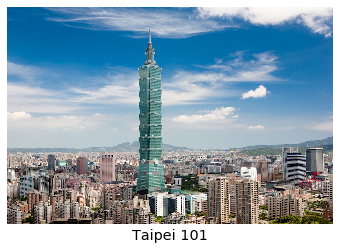

In [6]:
if len(analysis['result']['landmarks'])>0: #如果有地標
    landmark_name = analysis['result']['landmarks'][0]['name']#取得地標名稱
    print(landmark_name)
    image = Image.open(BytesIO(requests.get(image_url).content))
    plt.imshow(image)
    plt.axis('off')
    _ = plt.title(landmark_name,size = 'x-large', y = -0.1)
else:  #未傳回地標
    print('無法辨識地標')

In [ ]:
#辨識名人

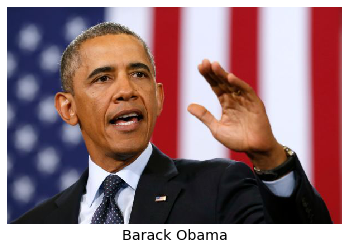

In [7]:
landmark_analyze_url = vision_base_url + "models/landmarks/analyze"
image_url = "https://i.imgur.com/mjxKiO8.jpg"  #歐巴馬
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params  = {'model': 'celebrities'}
data    = {'url': image_url}
response = requests.post(landmark_analyze_url, headers=headers, params=params, json=data)
analysis = response.json()
#print(analysis)

if len(analysis["result"]["celebrities"]) > 0:  #如果有名人
    landmark_name = analysis["result"]["celebrities"][0]["name"]  #取得名人資訊
    image = Image.open(BytesIO(requests.get(image_url).content))
    plt.imshow(image)
    plt.axis("off")
    _ = plt.title(landmark_name, size="x-large", y=-0.1)
else:  #未傳回
    print("無法辨識")
    